In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix # for the confusion matrix

__Read Dataset__

In [73]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [75]:
df.nunique()

meanfreq    3166
sd          3166
median      3077
Q25         3103
Q75         3034
IQR         3073
skew        3166
kurt        3166
sp.ent      3166
sfm         3166
mode        2825
centroid    3166
meanfun     3166
minfun       913
maxfun       123
meandom     2999
mindom        77
maxdom      1054
dfrange     1091
modindx     3079
label          2
dtype: int64

__Encoding Terget variable__

In [76]:
df.label = LabelEncoder().fit_transform(df.label)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [77]:
df.label.unique()

array([1, 0], dtype=int64)

__Create dependent and independent dataset for logistic regression__

In [88]:
x = df.drop('label',axis=1)
y = df.label

xs=StandardScaler().fit_transform(x)

__Create Training and Test Dataset__

__Create ML Model and fit training dataset__

In [93]:
logre = LogisticRegression()
logre.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

__Check the accurecy of the Model__

In [94]:
y_pred = logre.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logre.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [95]:
confusion_matrix(y_test, y_pred) # Confusion matrix [actual No,actual Yes]X[Predict No,Predict Yes]

array([[316,  12],
       [ 10, 296]], dtype=int64)

### Try to imporove the model ###

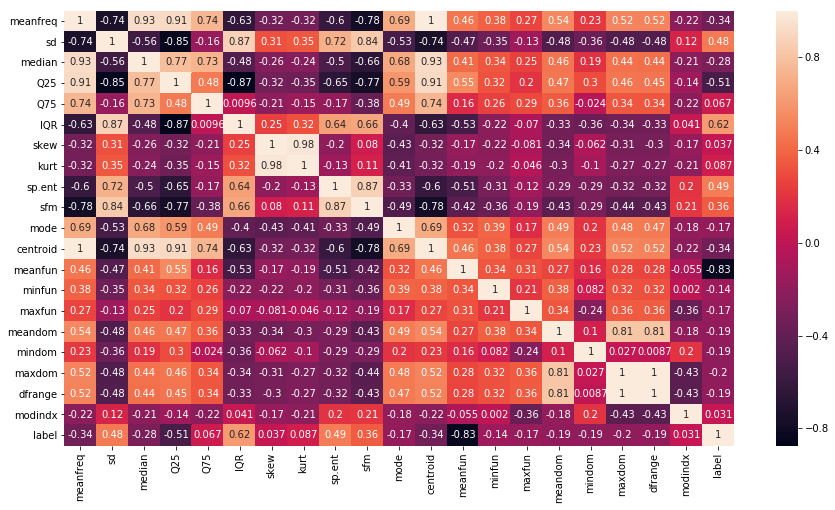

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

__Remove Correlated Predictor to imporve the score. Identify correlated variable pairs and remove one among them.__

In [108]:
x = df.drop(['label','IQR','meanfun','Q25','sp.ent','sd','centroid'],axis=1)

xs=StandardScaler().fit_transform(x)

In [109]:
x_train,x_test,y_train,y_test = train_test_split(xs,y,test_size=0.2)

In [110]:
logre = LogisticRegression()
logre.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
y_pred = logre.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logre.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [112]:
confusion_matrix(y_test, y_pred) # Confusion matrix [actual No,actual Yes]X[Predict No,Predict Yes]

array([[257,  52],
       [ 48, 277]], dtype=int64)